**Application of the specified Supervised ML Algorithms using the provided Dataset** 
**italicized text**
**[Logistic Regression, Decision Trees, Support Vector Classifier, K- Nearest Neighbours Algorithms]**

**Author: Nagasai Panuganti**

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv("test_AV3.csv")

In [144]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y


In [145]:
pd.isnull(df).any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [146]:
df['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [147]:
df['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [148]:
df['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [149]:
df['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [150]:
df['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [0]:
df["Gender"].fillna("Male", inplace = True)
df["Married"].fillna("Yes", inplace = True)
df["Dependents"].fillna(0, inplace = True)
df["Self_Employed"].fillna("No", inplace = True)
df["Credit_History"].fillna(1.0,inplace=True)


In [152]:
pd.isnull(df).any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
df['LoanAmount'].fillna(value=df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mean(),inplace=True)

In [154]:
pd.isnull(df).any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
from sklearn.preprocessing import LabelEncoder
gender_new = LabelEncoder()
married_new = LabelEncoder()
education_new = LabelEncoder()
self_new = LabelEncoder()
prop_new=LabelEncoder()
loan_new=LabelEncoder()

In [0]:
df['Gender'] = gender_new.fit_transform(df['Gender'])
df['Married'] = married_new.fit_transform(df['Married'])
df['Self_Employed'] = self_new.fit_transform(df['Self_Employed'])
df['Education'] = education_new.fit_transform(df['Education'])
df['Property_Area'] = prop_new.fit_transform(df['Property_Area'])
df['Loan_Status'] = loan_new.fit_transform(df['Loan_Status'])

In [157]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,1
6,LP001055,0,0,1,1,0,2226,0,59.0,360.0,1.0,1,1
7,LP001056,1,1,2,1,0,3881,0,147.0,360.0,0.0,0,0
8,LP001059,1,1,2,0,0,13633,0,280.0,240.0,1.0,2,1
9,LP001067,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1,1


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
 12  Loan_Status        367 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 37.4+ KB


In [159]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,1,1,4009,1777,113.0,360.0,1.0,2,1
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,1
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,1


In [0]:
df.replace(to_replace ="3+", value =3,inplace=True) 

In [0]:
x_train=df.iloc[:,1:12]
y_train=df.iloc[:,12]

In [0]:
x_test=df.iloc[:,1:12]
y_test=df.iloc[:,12]

In [163]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
acc_logistic = model.score(x_test,y_test)
print("Using Logistic Regression, the accuracy is: %f "%(acc_logistic * 100))

Using Logistic Regression, the accuracy is: 100.000000 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [164]:
#Decision Tree 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
acc_dt = model.score(x_test,y_test)
print("Using Decision Trees, the accuracy is: %f "%(acc_dt * 100))

Using Decision Trees, the accuracy is: 100.000000 


In [165]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
acc_svc = model.score(x_test, y_test)
print("Using Support Vector Classifier, the accuracy is: %f "%(acc_svc * 100))

Using Support Vector Classifier, the accuracy is: 84.468665 


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [167]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       309

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367



In [0]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df.iloc[:,1:-1],df['Loan_Status'],cv=10)
    accuracy_rate.append(score.mean())

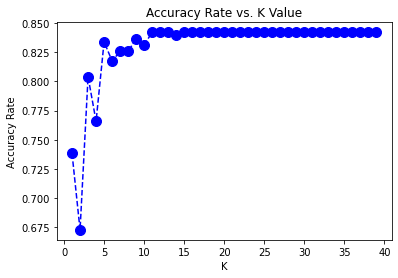

In [169]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [170]:
# NOW WITH K=27
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[  0  58]
 [  0 309]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.84      1.00      0.91       309

    accuracy                           0.84       367
   macro avg       0.42      0.50      0.46       367
weighted avg       0.71      0.84      0.77       367



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
print("The Accuracy of various models(using SVC, Decision Tree, Logistic Regression, KNN Algorithms) are:\n")
print("Using Logistic Regression, the accuracy is: %f \n"%(acc_logistic * 100))
print("Using Decision Trees, the accuracy is: %f \n"%(acc_dt * 100))
print("Using Support Vector Classifier, the accuracy is: %f \n"%(acc_svc * 100))
print("Using KNN Algorithm,",classification_report(y_test,pred))

The Accuracy of various models(using SVC, Decision Tree, Logistic Regression, KNN Algorithms) are:

Using Logistic Regression, the accuracy is: 100.000000 

Using Decision Trees, the accuracy is: 100.000000 

Using Support Vector Classifier, the accuracy is: 84.468665 

Using KNN Algorithm,               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.84      1.00      0.91       309

    accuracy                           0.84       367
   macro avg       0.42      0.50      0.46       367
weighted avg       0.71      0.84      0.77       367



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
